In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [27]:
df = pd.read_csv('fcc-forum-pageviews.csv')
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [40]:
# df = df.set_index('date')
df.head(10)
df.count()

value    1238
dtype: int64

In [41]:
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

In [42]:
df.count() 

value    1176
dtype: int64

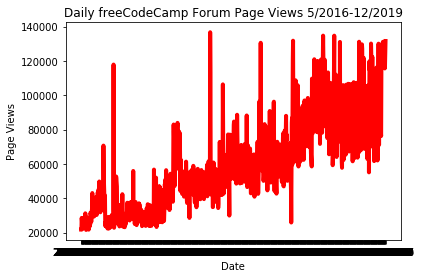

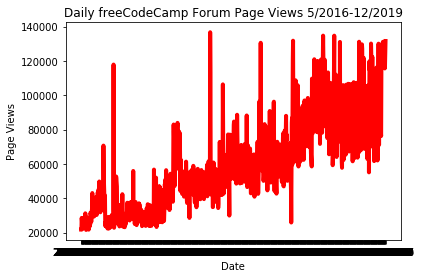

In [43]:
fig, ax = plt.subplots()
ax.plot(df.index, df['value'] , label = 'Línea 1', linewidth = 4, color = 'red' )

ax.set(xlabel='Date', ylabel='Page Views', title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    # Save image and return fig (don't change this part)
fig.savefig('line_plot.png')
fig

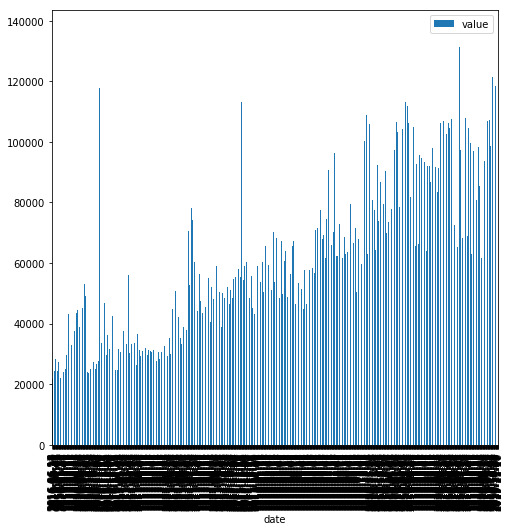

In [44]:
fig = df.plot(kind ='bar', figsize=(8, 8)).figure
plt.plot(label=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],xlabel = 'Years',ylabel='Average Page Views')
# plt.plot(label=['January'],xlabel = 'Years',ylabel='Average Page Views',color='red')
plt.show()

In [45]:
df['date'] = pd.to_datetime(df['date'])
r = df.groupby(by=[df.date.dt.year, df.date.dt.month])
f = round(r.mean())
f.index.names = ['year','month']
f.reset_index(inplace=True)
f['Months'] = f['month'].apply(lambda x: calendar.month_name[x])

df_bar = f

    # Draw bar plot

fig, ax = plt.subplots()
g = sns.catplot(x="year", y="value", hue="Months", data=df_bar, height=6, kind="bar", palette="bright", legend=False,)
g.despine(left=True)
g.set_ylabels("Average Page Views")
g.set_xlabels("Years")
plt.legend(title='Months', loc='upper left', labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
fig = g.fig
fig

KeyError: 'date'

In [ ]:
# https://repl.it/@AkhilWase/fcc-time-series-visualizer